In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [12]:
def set_data():
    wine = load_wine()
    return wine

In [13]:
def scatter_plot(wine):
    fig  =plt.figure()
    colors = ['r', 'g', 'b']
    
    # plt.scatter(wine.data[:, 0], wine.data[:, 1], c = wine.target) -> 아래 있는 반복문 안쓰고도 한줄로도 가능함.
    for target, color in zip(np.unique(wine.target), colors):
        data = wine.data[wine.target == target]
        plt.scatter(data[:, 0], data[:, 1], color = color, alpha = 0.3)
    plt.xlabel('Alcohol')
    plt.ylabel('Malic_acid')
    plt.show()

In [14]:
def data_split(wine):
    x_train, x_test, y_trian, y_test = train_test_split(wine.data, wine.target, test_size = 0.2, random_state =  42)
    return x_train, x_test, y_trian, y_test

In [15]:
def decision_tree(X_train, y_train):
    model_D = DecisionTreeClassifier()
    model_D.fit(X_train, y_train)
    return model_D

In [16]:
def random_forest(X_train, y_train):
    model_R = RandomForestClassifier(n_estimators=50)
    model_R.fit(X_train, y_train)
    return model_R

In [17]:
def ada_boost(X_train, y_train):
    model_A = AdaBoostClassifier(algorithm = 'SAMME', n_estimators = 30,  learning_rate=0.1)
    model_A.fit(X_train, y_train)
    return model_A

In [18]:
def model_score(model, X_test, y_test):
    acc = accuracy_score(y_test, model.predict(X_test))

In [19]:
def main():
    Wine = set_data()
    scatter_plot(Wine)
    X_train, X_test, y_train, y_test = data_split(Wine)
    
    model_D = decision_tree(X_train, y_train)
    model_R = random_forest(X_train, y_train)
    model_A = ada_boost(X_train, y_train)
    
    print(f'Decision Tree score : {model_D.score(X_test, y_test)}')
    print(f'Random Forest score : {model_R.score(X_test, y_test)}')
    print(f'Ada Boost score : {model_A.score(X_test, y_test)}')

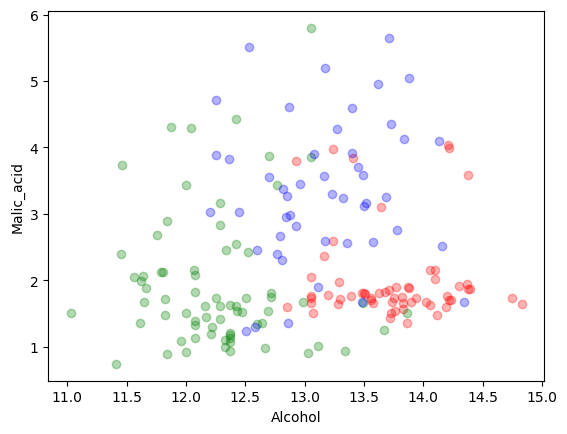

Decision Tree score : 0.9444444444444444
Random Forest score : 1.0
Ada Boost score : 0.8333333333333334


In [20]:
main()